# Stock Price Prediction - Apple.Inc


<img src="https://img3.wallspic.com/previews/2/0/1/3/6/163102/163102-apple-apples-apple_logo_steve_jobs_face-logo-clip_art-x750.jpg" width="480">

> This notebook aims to provide a comprehensive analysis of **Apple** company's stock price prediction ranging from the year `1980-2021` using **LSTM [Long Short Term Memory]** model. Predicting stock prices is one of the most challenging tasks in finance, and we will use LSTM model to find the most accurate predictions for Apple's stock price.

## Table of Contents

- Importing the necessary libraries
- Importing the dataset
- Data Preprocessing
- Feature Enginering
- Exploratory Data Analysis
- LSTM Modeling
- Model Evaluation
- Conclusion

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM

**Importing the dataset**



In [3]:
df = pd.read_csv('C:/Users/kavin/Downloads/AAPL.csv') # Load Dataset

Data Description 

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
## Statistical summary of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


**Data Preprocessing**

In [6]:
# check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# check for duplicate rows
df.duplicated().sum()

# drop duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# check the data types of the columns
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# set the 'Date' column as the index
#df.set_index('Date', inplace=True)

**Feature Engineering**

In [10]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data['Date'].dt.dayofweek
    
    # Add month feature
    data['month'] = data['Date'].dt.month
    
    # Add quarter feature
    data['quarter'] = data['Date'].dt.quarter
    
    # Add year feature
    data['year'] = data['Date'].dt.year
    
    # Add week of the year feature
    data['week_of_year'] = data['Date'].dt.isocalendar().week
    
    # Add day of the year feature
    data['day_of_year'] = data['Date'].dt.dayofyear
    
    # Add lagged features
    data['lag_1'] = data['Close'].shift(1)
    data['lag_2'] = data['Close'].shift(2)
    data['lag_3'] = data['Close'].shift(3)
    data['lag_4'] = data['Close'].shift(4)
    data['lag_5'] = data['Close'].shift(5)
    
    return data


<a id="3.1"></a>
###  Apply the function to the data 
Apply the function to the stock prices data and dropping any row with missing values


In [11]:
# Apply the function to the data
df = add_features(df)

# Drop rows with missing values
df.dropna(inplace=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,4,12,4,1980,51,354,0.118862,0.115513,0.112723,0.121652,0.128348
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,0,12,4,1980,52,357,0.126116,0.118862,0.115513,0.112723,0.121652
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,1,12,4,1980,52,358,0.132254,0.126116,0.118862,0.115513,0.112723
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,2,12,4,1980,52,359,0.137835,0.132254,0.126116,0.118862,0.115513
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,4,12,4,1980,52,361,0.145089,0.137835,0.132254,0.126116,0.118862


**Exploratory Data Analysis**    

<Figure size 720x432 with 0 Axes>

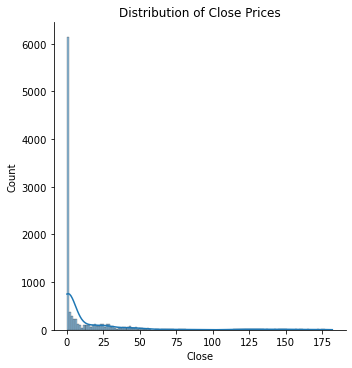

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=df, x='Close', kde=True)
plt.title('Distribution of Close Prices')
plt.show()

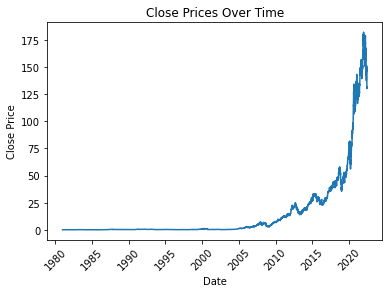

In [21]:
# Line plot of close prices over time
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

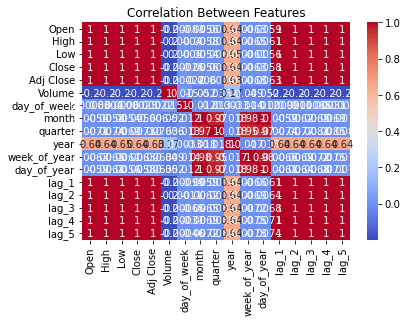

In [22]:
# Heatmap of correlation between features
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()

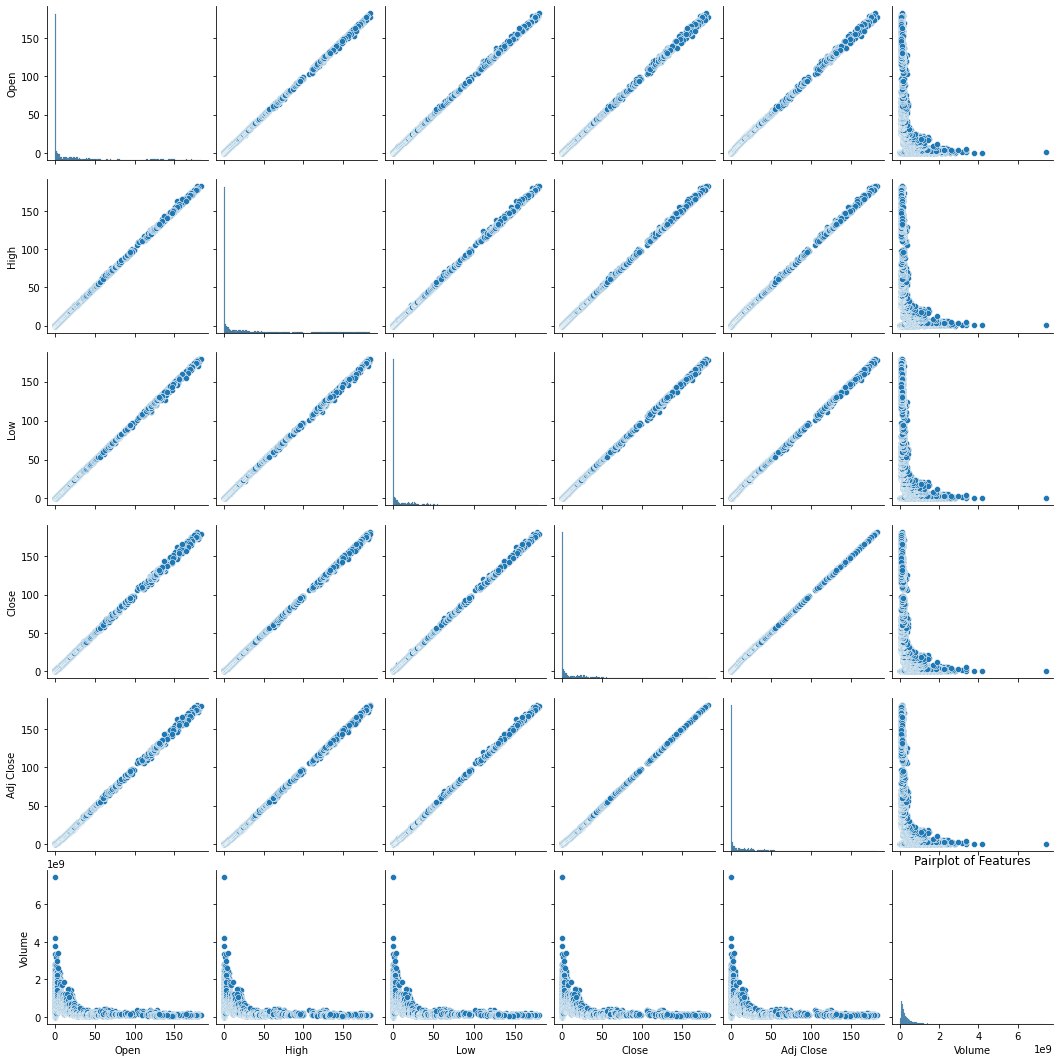

In [23]:
# Pairplot of features
sns.pairplot(data=df, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
plt.title('Pairplot of Features')
plt.show()

<a id='5.5'></a>
### LSTM Model 


In [13]:
from keras.layers import Dropout

In [14]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
len_train_data = int(np.ceil( len(dataset) * .95 ))

len_train_data

9940

In [15]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[4.23217323e-04],
       [4.56949847e-04],
       [4.87621274e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [16]:
# Create the training data set 
# Create the scaled training data set
train_data = trained_scaled_data[0:int(len_train_data), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214,
       0.00026068, 0.00028214, 0.00027601, 0.00029748, 0.00032508])]
[0.00036187996620460543]

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=14)

Epoch 1/14
309/309 [==============================] - 17s 44ms/step - loss: 1.5883e-04
Epoch 2/14
309/309 [==============================] - 12s 38ms/step - loss: 1.8115e-05
Epoch 3/14
309/309 [==============================] - 11s 37ms/step - loss: 1.7330e-05
Epoch 4/14
309/309 [==============================] - 11s 37ms/step - loss: 1.7297e-05
Epoch 5/14
309/309 [==============================] - 11s 37ms/step - loss: 1.7382e-05
Epoch 6/14
309/309 [==============================] - 11s 37ms/step - loss: 1.5549e-05
Epoch 7/14
309/309 [==============================] - 12s 40ms/step - loss: 1.4714e-05
Epoch 8/14
309/309 [==============================] - 13s 41ms/step - loss: 1.3012e-05
Epoch 9/14
309/309 [==============================] - 12s 40ms/step - loss: 1.4371e-05
Epoch 10/14
309/309 [==============================] - 12s 38ms/step - loss: 1.2116e-05
Epoch 11/14
309/309 [==============================] - 12s 40ms/step - loss: 1.0829e-05
Epoch 12/14
309/309 [====================

**Model Evaluation**

In [18]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = trained_scaled_data[len_train_data - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[len_train_data:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
# Baseline model
mse_lstm = mean_squared_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions)
mape_lstm = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2_lstm = r2_score(y_test, predictions)

print('lstm Model:')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'R2 Score: {r2_lstm:.2f}\n')

17/17 [==============================] - 1s 14ms/step
lstm Model:
MSE: 26.85
RMSE: 5.18
MAE: 4.28
MAPE: 3.13%
R2 Score: 0.95



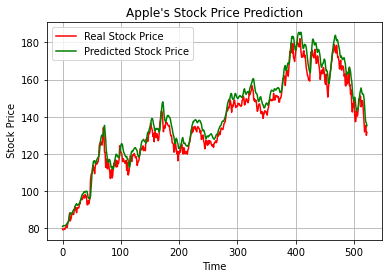

In [26]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'green', label = 'Predicted Stock Price')
plt.title("Apple's Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.grid(True)
plt.legend()
plt.show()

The LSTM model shows promising performance 

1. Low prediction errors (MSE and RMSE) and relatively small deviations from the actual values (MAE). 

2. The MAPE indicates a low average percentage difference, suggesting accurate predictions in relative terms. 

3. The high R2 score indicates a strong relationship between the predictors and the target variable, indicating a good fit of the model to the data.

**Conclusion**
> In this project, we analyzed and predicted the stock prices of Apple Inc. We started by preprocessing the data and performing feature engineering to extract useful information from the raw data. Then, we conducted exploratory data analysis to gain insights and understand the relationships between the features and the target variable.Finally we implemented the **LSTM** model to predict the accuracy of the dataset.